# Deep Learning with Python Book Examples
## 2 - The Mathematical Building Blocks of Neural Networks

### 2.1 - A First Look at a Neural Network

In [ ]:
from keras import models
from keras import layers
from keras.datasets import mnist
from keras.utils import to_categorical
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import numpy as np

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [ ]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")

#### 2.5. Looking back at our first example

  You’ve reached the end of this chapter, and you should now have a general understanding of what’s going on behind the scenes in a neural network. Let’s go back to the first example and review each piece of it in the light of what you’ve learned in the previous three sections.

  This was the input data:


  Now you understand that the input images are stored in Numpy tensors, which are here formatted as float32 tensors of shape (60000, 784) (training data) and (10000, 784) (test data), respectively.

  
  This was our network:

In [ ]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

  Now you understand that this network consists of a chain of two Dense layers, that each layer applies a few simple tensor operations to the input data, and that these operations involve weight tensors. Weight tensors, which are attributes of the layers, are where the knowledge of the network persists.

  This was the network-compilation step:

In [ ]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Now you understand that categorical_crossentropy is the loss function that’s used as a feedback signal for learning the weight tensors, and which the training phase will attempt to minimize. You also know that this reduction of the loss happens via mini-batch stochastic gradient descent. The exact rules governing a specific use of gradient descent are defined by the rmsprop optimizer passed as the first argument.

Finally, this was the training loop:

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Now you understand what happens when you call fit: the network will start to iterate on the training data in mini-batches of 128 samples, 5 times over (each iteration over all the training data is called an epoch). At each iteration, the network will compute the gradients of the weights with regard to the loss on the batch, and update the weights accordingly. After these 5 epochs, the network will have performed 2,345 gradient updates (469 per epoch), and the loss of the network will be sufficiently low that the network will be capable of classifying handwritten digits with high accuracy.

At this point, you already know most of what there is to know about neural networks.

## 3 - Getting Started with Neural Networks

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

# the following example is witheld until chapter 7
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)
model2 = models.Model(inputs=input_tensor, outputs=output_tensor)



### Classifying Movie Reviews: a Binary Classification Example
The following code pulls data from the IMDB dataset and tries to classify a movie review based on the text content of the reviews

In [ ]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [ ]:
print(train_data[0])
print(train_labels[0])

word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

print(decoded_review)

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.

    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print(x_train)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
from keras import models
from keras import layers
import matplotlib.pyplot as plt

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
loss_values = history_dict['loss']
val_los_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

print(history_dict.keys())

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_los_values, 'b', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


In [ ]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### Retraining a Model from Scratch

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

print(results)
print(model.predict(x_test))

In [ ]:
from keras import models
from keras import layers
import matplotlib.pyplot as plt

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
loss_values = history_dict['loss']
val_los_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

print(history_dict.keys())

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_los_values, 'b', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

results = model.evaluate(x_test, y_test)

print(results)
print(model.predict(x_test))

### Loading the Reuters Dataset

8982
2246
[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
Epoch 1/20
16/16 [==============================] - 1s 28ms/step - loss: 2.6737 - accuracy: 0.4910 - val_loss: 1.8209 - val_accuracy: 0.5950
Epoch 2/20
16/16 [==============================] - 0s 18ms/step - loss: 1.5252 - accuracy: 0.6715 - val_loss: 1.3694 - val_accuracy: 0.6900
Epoch 3/20
16/16 [==============================] - 0s 18ms/step - loss: 1.1565 - accuracy: 0.7428 - val_loss: 1.1709 - val_accuracy: 0.7340
Epoch 4/20
16/16 [==============

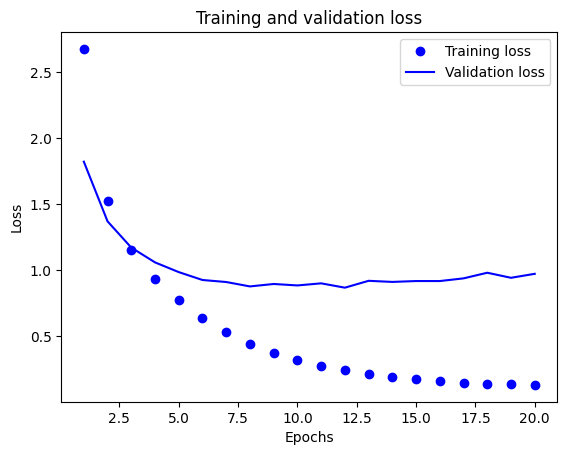

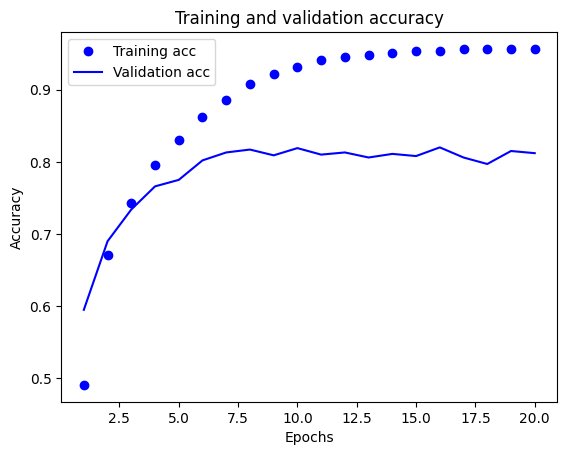

Epoch 1/9
16/16 [==============================] - 2s 70ms/step - loss: 2.3992 - accuracy: 0.5060 - val_loss: 1.5516 - val_accuracy: 0.6650
Epoch 2/9
16/16 [==============================] - 1s 52ms/step - loss: 1.3157 - accuracy: 0.7125 - val_loss: 1.2148 - val_accuracy: 0.7320
Epoch 3/9
16/16 [==============================] - 1s 51ms/step - loss: 0.9865 - accuracy: 0.7849 - val_loss: 1.0675 - val_accuracy: 0.7650
Epoch 4/9
16/16 [==============================] - 1s 49ms/step - loss: 0.7558 - accuracy: 0.8388 - val_loss: 0.9759 - val_accuracy: 0.8010
Epoch 5/9
16/16 [==============================] - 1s 48ms/step - loss: 0.5934 - accuracy: 0.8720 - val_loss: 0.9032 - val_accuracy: 0.8140
Epoch 6/9
16/16 [==============================] - 1s 46ms/step - loss: 0.4561 - accuracy: 0.9068 - val_loss: 0.8897 - val_accuracy: 0.8040
Epoch 7/9
16/16 [==============================] - 1s 52ms/step - loss: 0.3780 - accuracy: 0.9181 - val_loss: 0.8706 - val_accuracy: 0.8160
Epoch 8/9
16/16 [===

[0.9463998079299927, 0.790739119052887]

In [14]:
import copy
import matplotlib.pyplot as plt
import numpy as np

from keras import models
from keras import layers
from keras.datasets import reuters

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1

    return results

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1

    return results

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print(len(train_data))
print(len(test_data))
print(train_data[10])

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_newswire)

x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

x_val = x_train[:1000]
y_val = one_hot_train_labels[:1000]
partial_x_train = x_train[1000:]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

results